#### Reduce CPT data Based on Terracon Savannah Raw Data Format by CL 2024-11-18

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def plot_data(z, qc, fs, u2, u0, Rf, Bq, ic, name):
    # Initialise Figures
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 20), dpi=300)
    ax1_1 = ax1.twiny()
    ax2_1 = ax2.twiny()
    ax3_1 = ax3.twiny()
    
    ##########################################################################################################################################################################
    # Set axes limits
    ax1.set_xlim(min(fs), max(fs))
    ax1.set_ylim(max(z), min(z))  # Reverse y-axis
    ax1.set_ylabel('Depth (m)')
    ax1.set_xlabel('fs (kPa)')
    ax1_1.set_xlim(min(qc), max(qc))
    ax1_1.set_ylim(max(z), min(z))  # Reverse y-axis
    ax1_1.set_xlabel('qc (MPa)')

    ax2.set_xlim(min(u2), max(u2))
    ax2.set_ylim(max(z), min(z))  # Reverse y-axis
    ax2.set_ylabel('Depth (m)')
    ax2.set_xlabel('Hydrostatic (kPa)')
    ax2_1.set_xlim(min(u2), max(u2))
    ax2_1.set_ylim(max(z), min(z))  # Reverse y-axis
    ax2_1.set_xlabel('Pore water pressure (kPa)')

    ax3.set_xlim(min(Bq), max(Bq))
    ax3.set_ylim(max(z), min(z))  # Reverse y-axis
    ax3.set_ylabel('Depth (m)')
    ax3.set_xlabel('Pore Pressure Ratio ')
    ax3_1.set_xlim(min(Rf), max(Rf))
    ax3_1.set_ylim(max(z), min(z))  # Reverse y-axis
    ax3_1.set_xlabel('Friction Ratio')
    
    ##########################################################################################################################################################################
    # Plot axes grids
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    
    ##########################################################################################################################################################################
    # Data Plots
    ax1_1.plot(qc, z, 'k-', lw=0.5)
    ax1.plot(fs, z, 'r-', lw=0.5)

    ax2_1.plot(u2, z, 'b-', lw=0.5)
    ax2.plot(u0, z, 'r-', lw=0.5)

    ax3_1.plot(Rf, z, 'k-', lw=0.5)
    ax3.plot(Bq, z, 'b-', lw=0.5)

    ##########################################################################################################################################################################
    # SBT Index Plot
    sbt = []
    for i in np.arange(len(ic)):
        if ic[i] > 3.6:
            sbt.append('SENS CLAY/SILT')
        elif ic[i] > 3:
            sbt.append('CLAY')
        elif ic[i] > 2.6:
            sbt.append('Silty CLAY')
        elif ic[i] > 2:
            sbt.append('Silty SAND + Sandy SILT')
        elif ic[i] > 1.4:
            sbt.append('Silty SAND')
        elif ic[i] > 1:
            sbt.append('SAND')
        else:
            sbt.append('Undefined')

    # Set axes limits for SBT Index
    ax4.set_ylim(max(z), 0)
    ax4.set_xlim(0, 3.6)
    ax4.set_ylabel('Depth (m)')
    ax4.set_xlabel('SBT Ic')
    ax4.xaxis.set_ticks_position('none')
    ax4.yaxis.set_ticks_position('none')
    ax4.set_xticklabels([])
    ax4.set_yticklabels([])

    # Soil Behaviour Type Legend
    sbt_legend_dict = {'SAND': 'yellow', 'Silty SAND': 'tan', 'Silty SAND + Sandy SILT': 'sandybrown', 'Silty CLAY': 'darkblue', 'CLAY': 'green', 'SENS CLAY/SILT': 'darkred'}
    sbtpatchList = []
    for key in sbt_legend_dict:
        sbt_key = mpatches.Patch(color=sbt_legend_dict[key], label=key)
        sbtpatchList.append(sbt_key)
    ax4.legend(handles=sbtpatchList, loc='upper right')

    # SBT Profile
    for i in np.arange(len(ic)):
        if ic[i] > 3.6:
            ax4.plot([0, 3.6], [z[i], z[i]], 'darkred', lw=4)
        elif ic[i] > 3:
            ax4.plot([0, 3], [z[i], z[i]], 'green', lw=4)
        elif ic[i] > 2.6:
            ax4.plot([0, 2.6], [z[i], z[i]], 'darkblue', lw=4)
        elif ic[i] > 2:
            ax4.plot([0, 2], [z[i], z[i]], 'sandybrown', lw=4)
        elif ic[i] > 1.4:
            ax4.plot([0, 1.4], [z[i], z[i]], 'tan', lw=4)

    # Save and show the plots
    plt.savefig(f"test/{name}_new_combined_plot.png")
    plt.show()


/tmp/ipykernel_9327/4252048333.py:90: RuntimeWarning: invalid value encountered in log10
  Ic = np.sqrt(np.power((3.47 - np.log10(Qt)), 2) + np.power((np.log10(FR) + 1.22), 2))  # Soil Behaviour Type Index


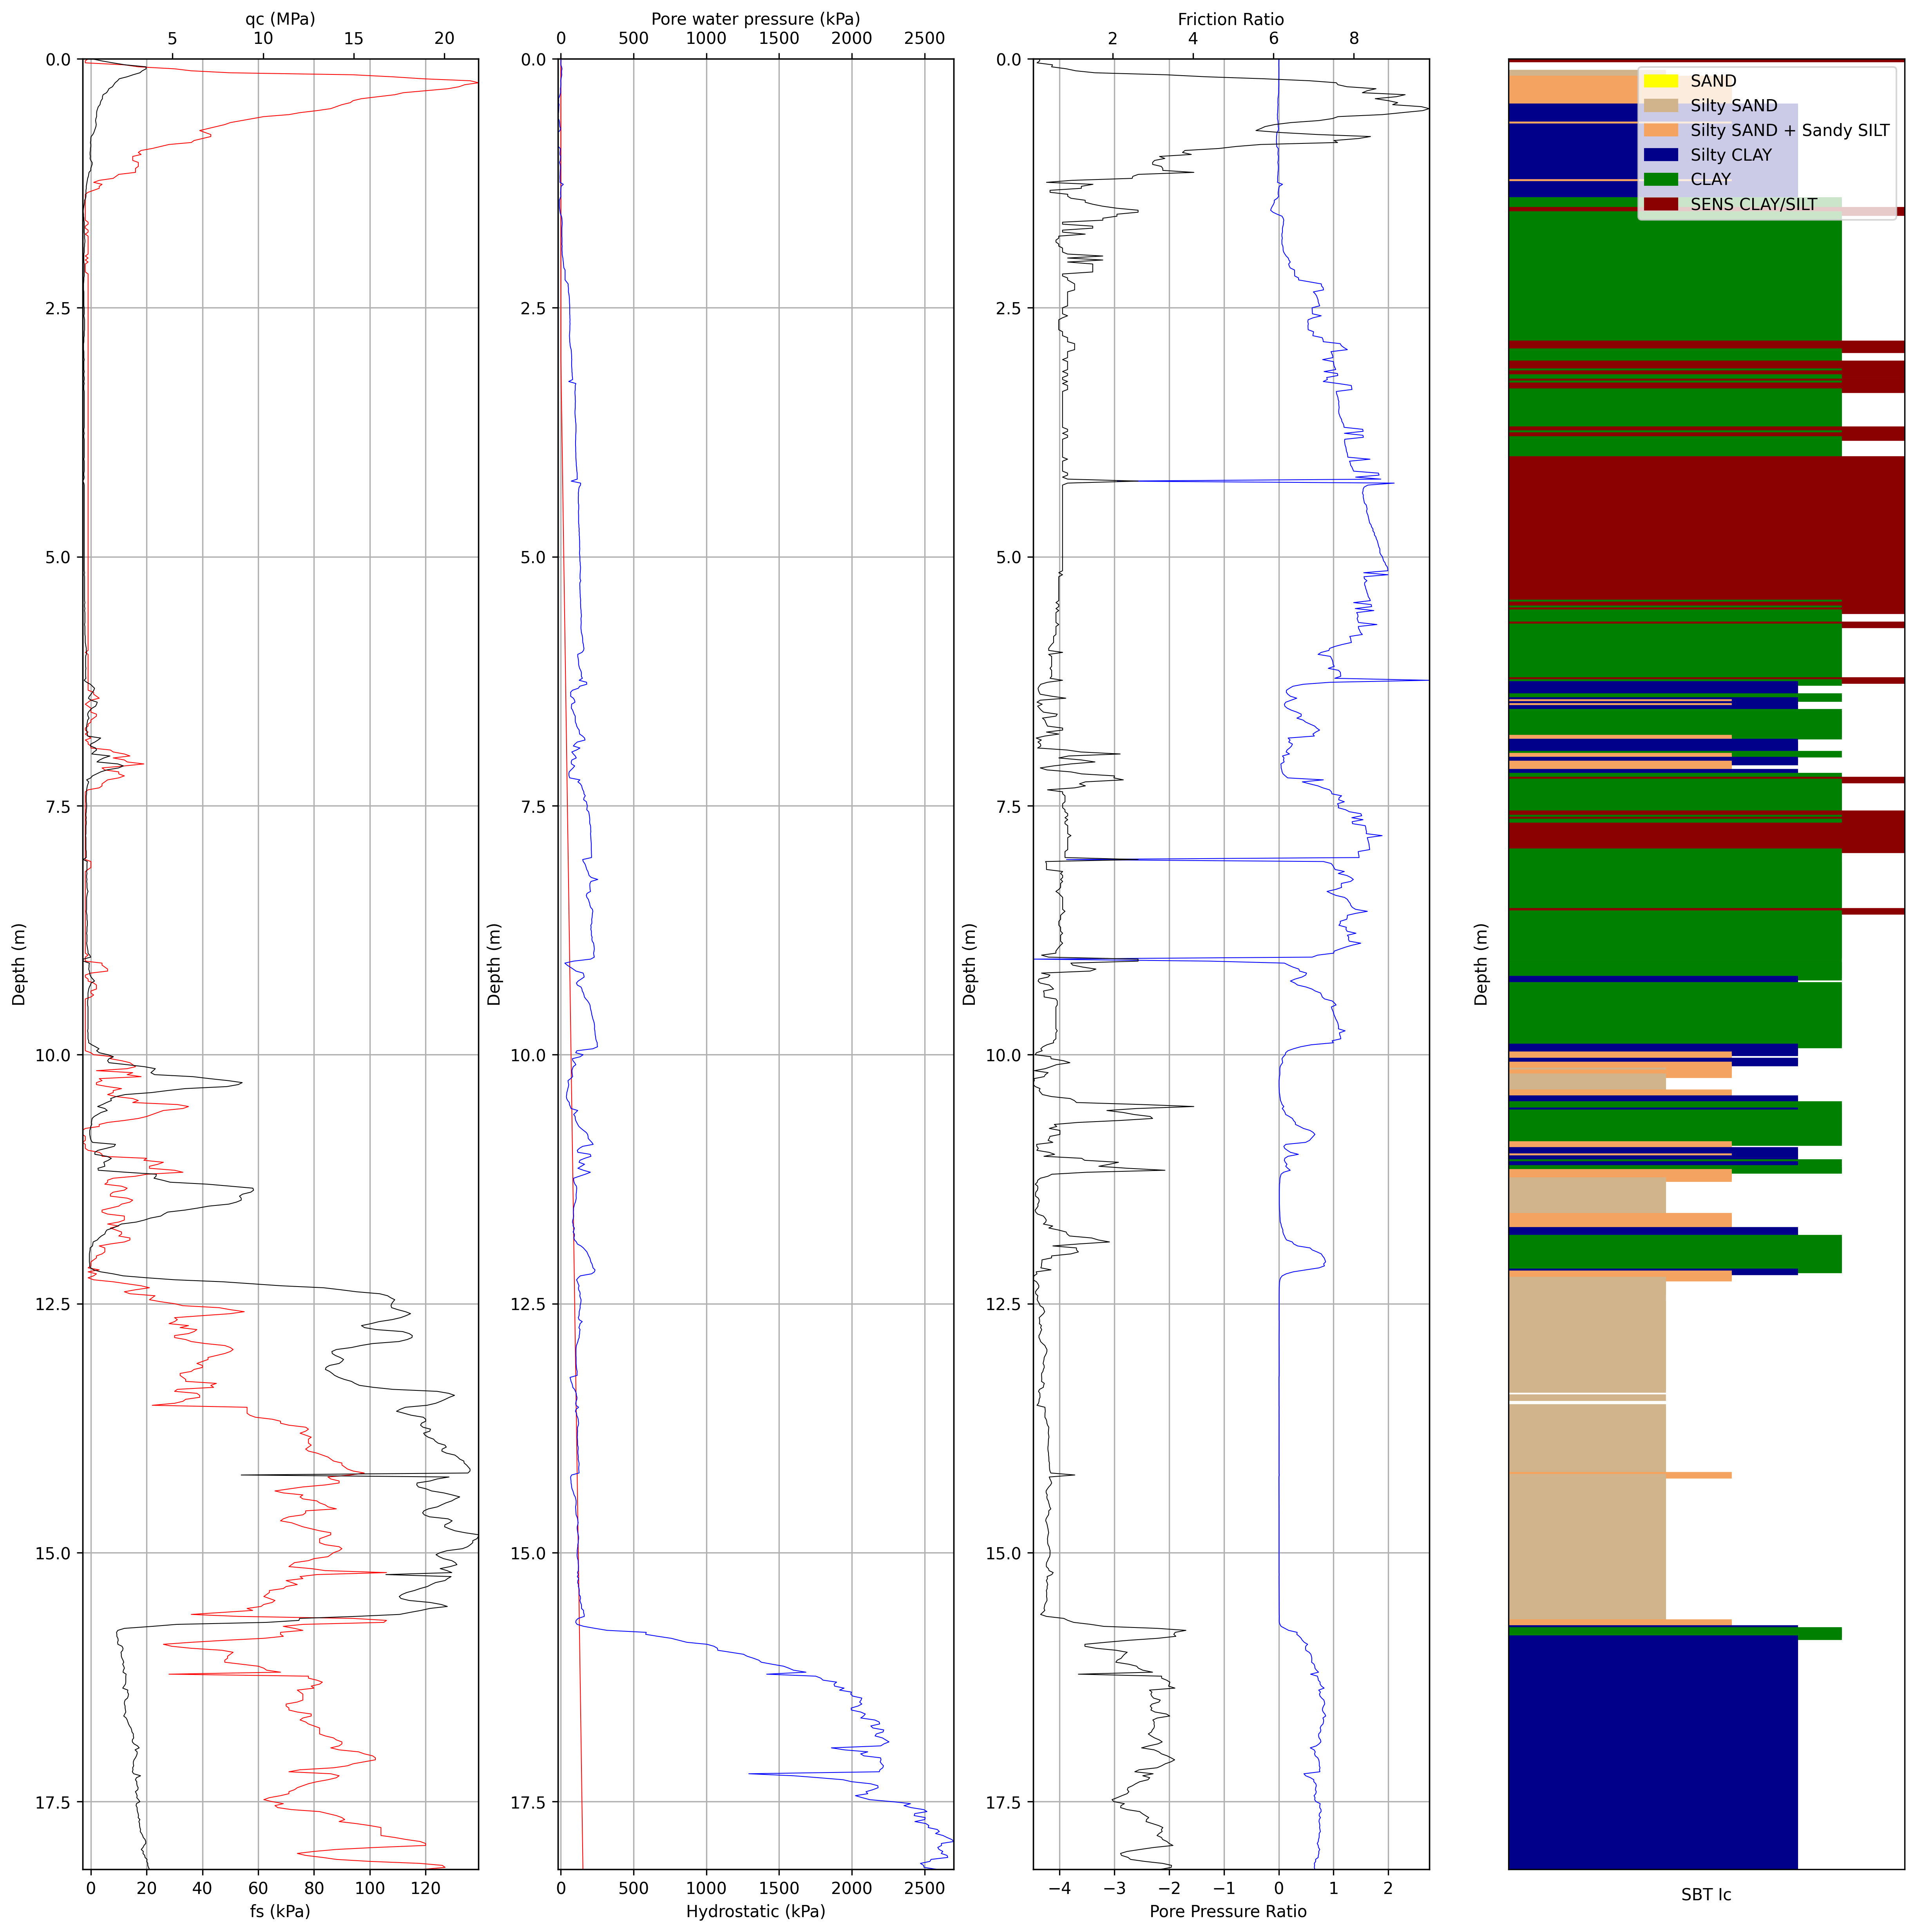

/tmp/ipykernel_9327/4252048333.py:90: RuntimeWarning: invalid value encountered in log10
  Ic = np.sqrt(np.power((3.47 - np.log10(Qt)), 2) + np.power((np.log10(FR) + 1.22), 2))  # Soil Behaviour Type Index


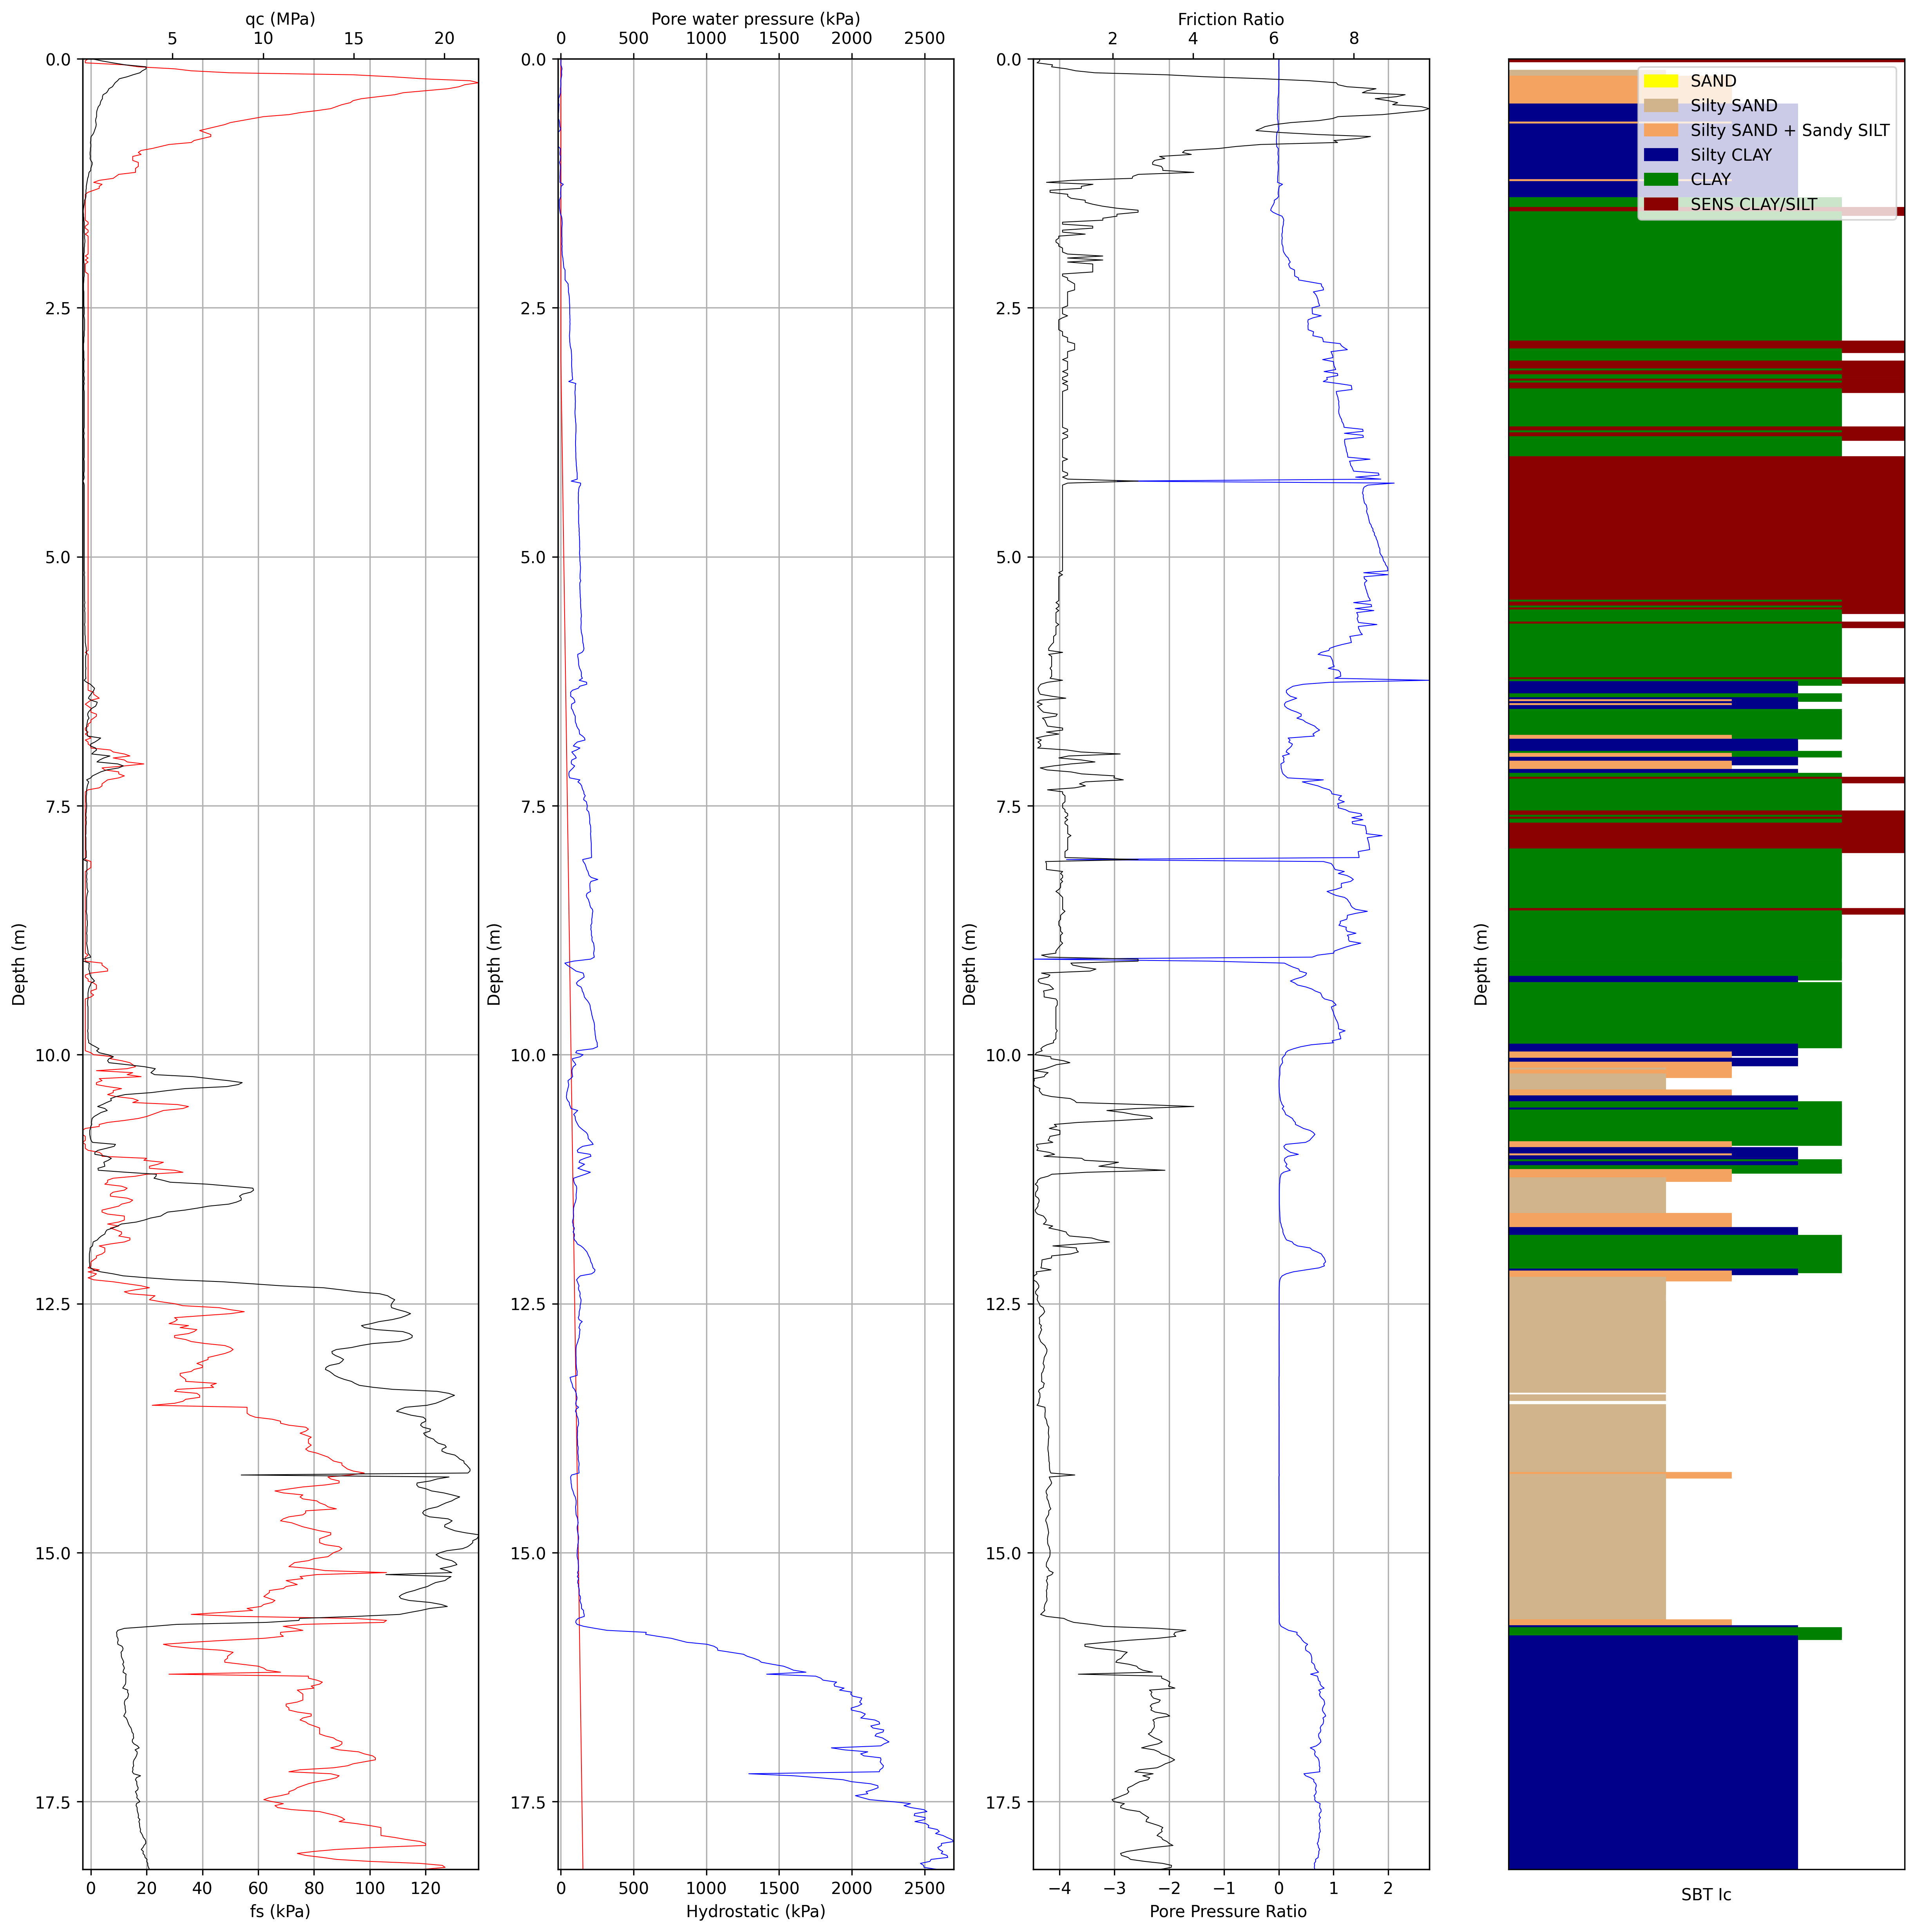

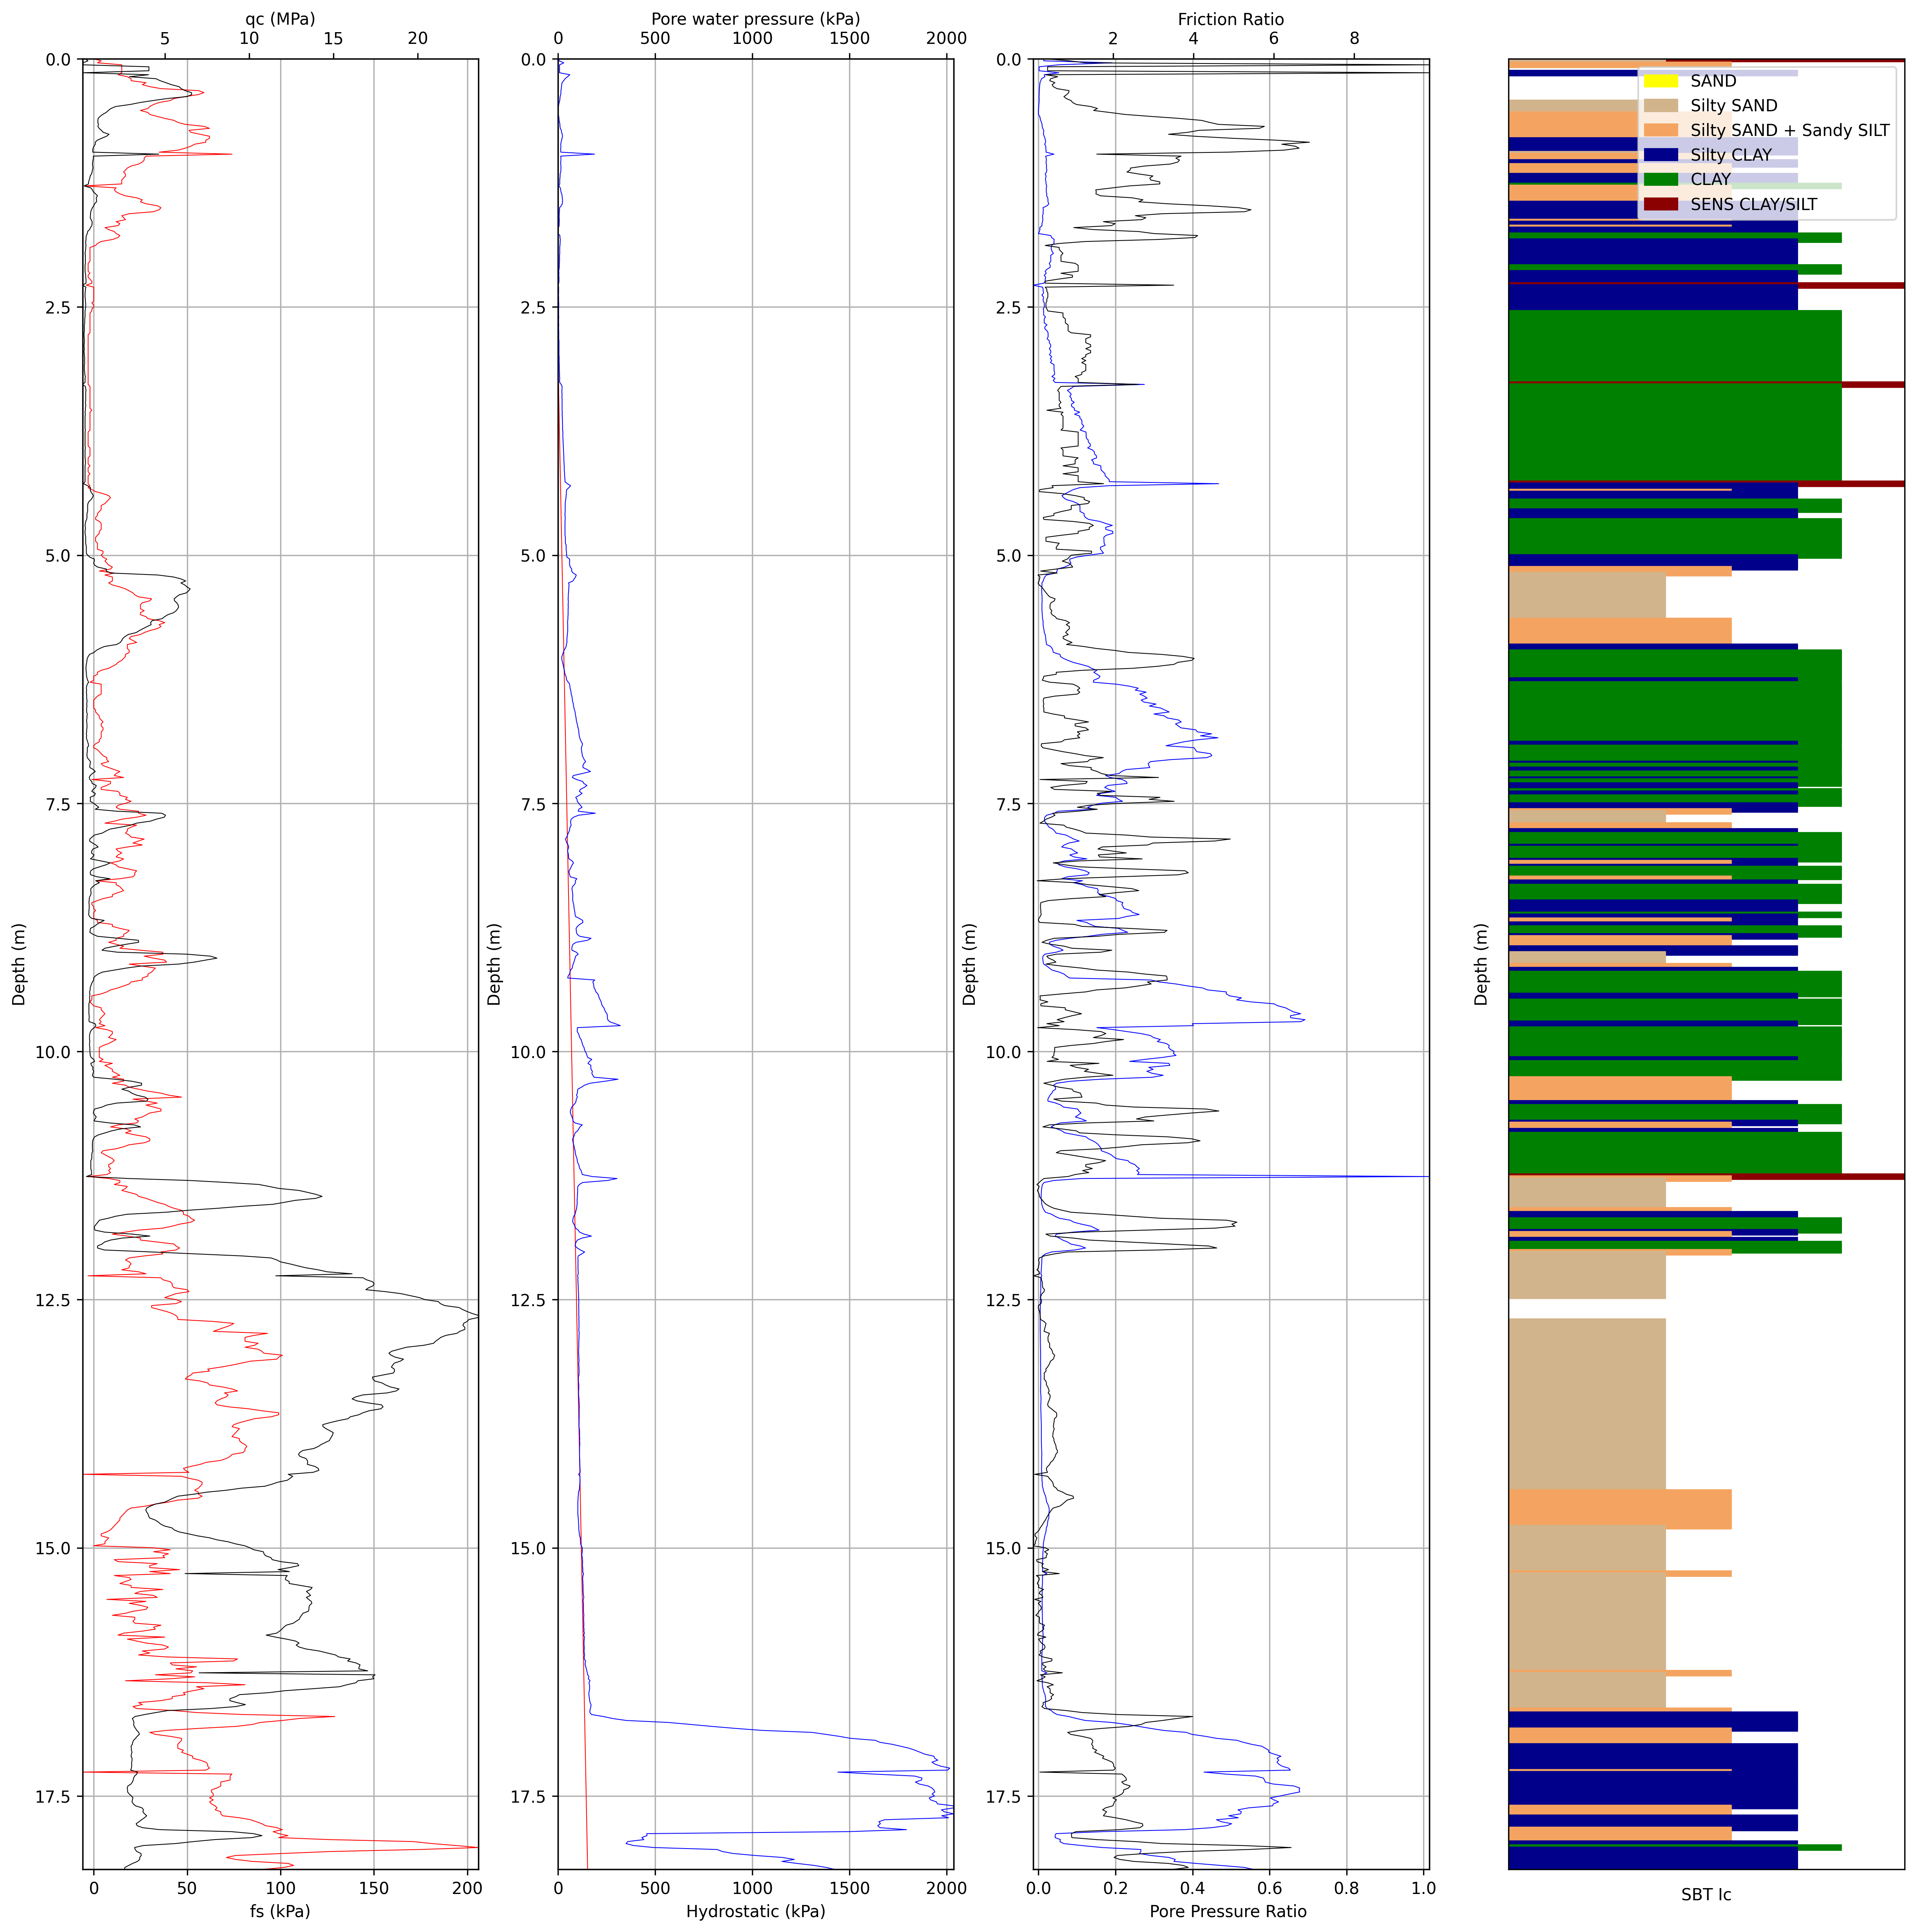

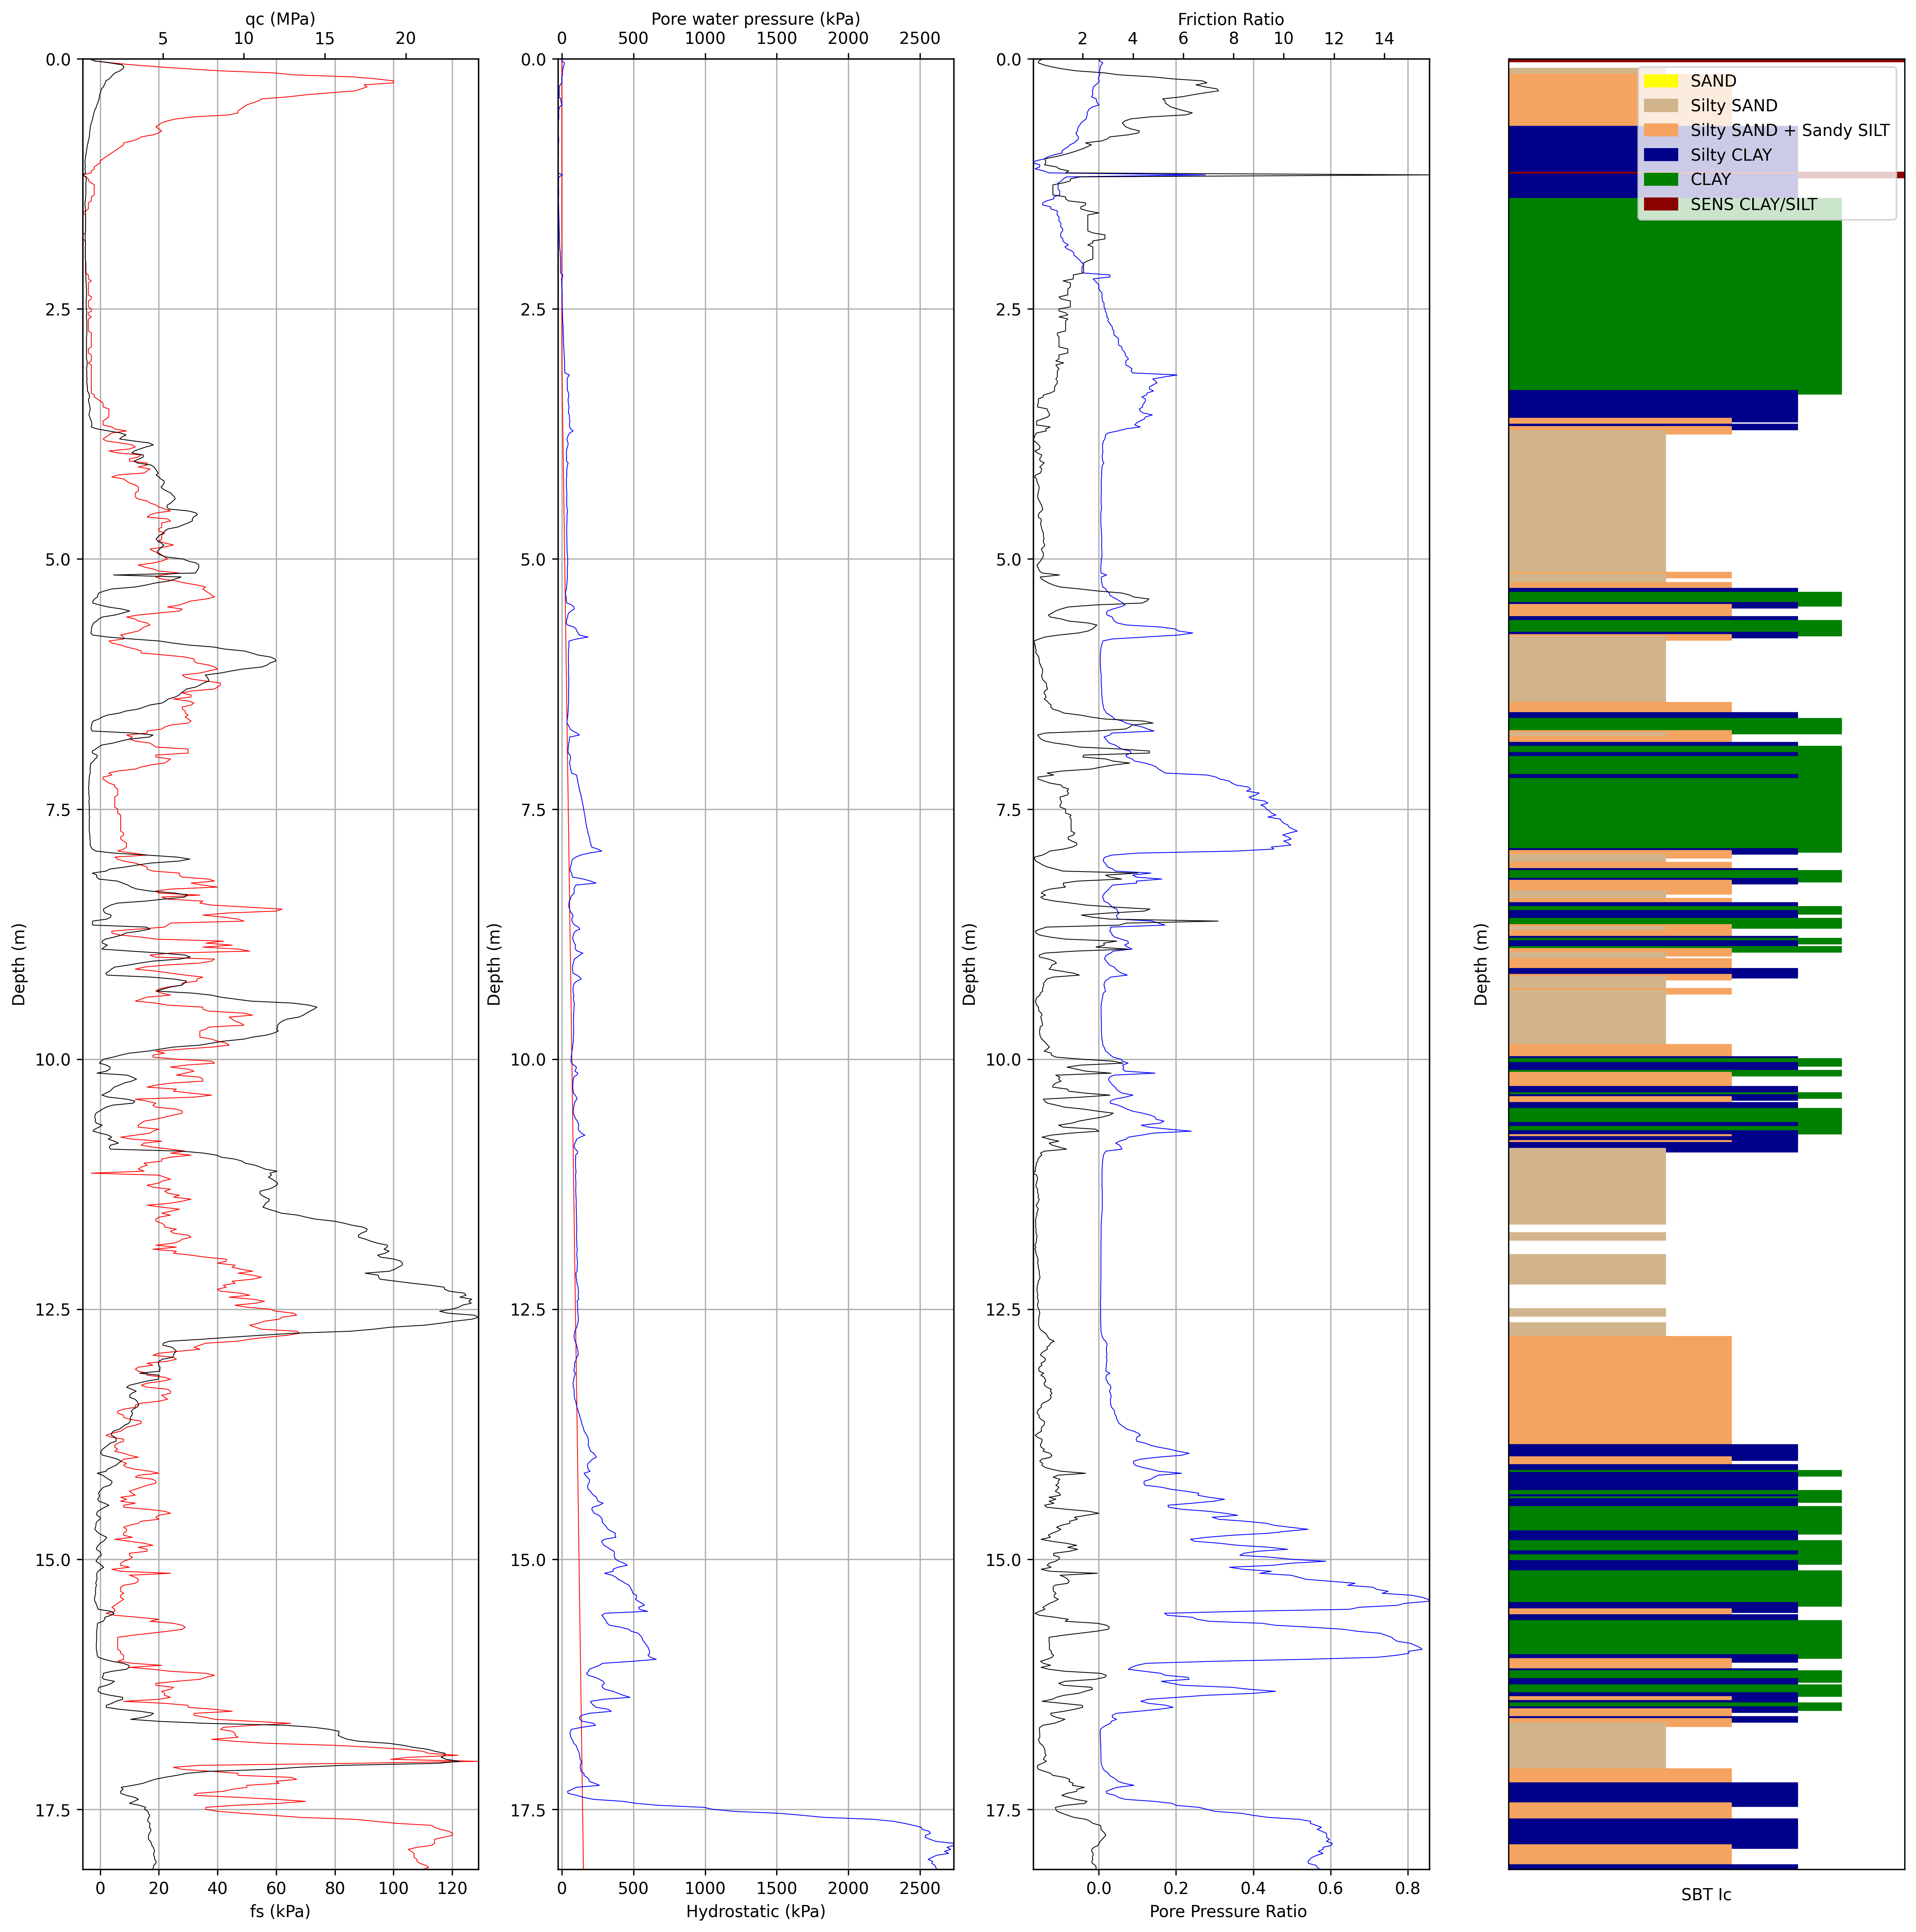

In [ ]:
import pandas as pd
import re
import numpy as np

file_paths = {'040C6.CPT': 'files/040C8.CPT', '040C8.CPT': 'files/040C8.CPT', '040C11.CPT': 'files/040C11.CPT', '040C15.CPT': 'files/040C15.CPT', '040C17.CPT': 'files/040C17.CPT'}
# Reading each file assuming they are in a fixed-width format 
uploaded_data_frames = {}
for name, path in file_paths.items():
    try:
        # Trying to load as a tab or space-separated file
        uploaded_data_frames[name] = pd.read_csv(path, sep=r'\s+', on_bad_lines='skip')
    except Exception:
        # If the above fails, trying comma separation as a fallback
        uploaded_data_frames[name] = pd.read_csv(path, sep=",", on_bad_lines='skip')

# Reducing data by selecting relevant columns and formatting them similarly to the previous procedure
def reduce_cpt_data(df):
    # Remove first two rows
    df = df.iloc[2:].reset_index(drop=True)

    # Extract the required columns (D, QC, FS, U)
    def extract_values(row):
        data = row["$"] if "$" in row else ""
        D = re.search(r"D=(-?[\d\.]+)", data)
        QC = re.search(r"QC=(-?[\d\.]+)", data)
        FS = re.search(r"FS=(-?[\d\.]+)", data)
        U = re.search(r"U=(-?[\d\.]+)", data)

        return {
            "Z (m)": float(D.group(1)) if D else None,
            "qc (MPa)": float(QC.group(1)) if QC else None,
            "fs (kPa)": float(FS.group(1)) if FS else None,
            "u2 (kPa)": float(U.group(1)) if U else None
        }
    
    # Apply extraction
    processed_df = df.apply(extract_values, axis=1, result_type="expand")

    return processed_df

# Process each sheet
reduced_data_frames = {name: reduce_cpt_data(df) for name, df in uploaded_data_frames.items()}

# Load the Excel file containing CPT file names and gwl values
gwl_file_path = "files/gwl.xlsx"


if not gwl_file_path:
    raise ValueError("No GWL file selected")

gwl_data = pd.read_excel(gwl_file_path)

# Create a dictionary with file names as keys and gwl values as values
gwl_dict = dict(zip(gwl_data.iloc[:, 0], gwl_data.iloc[:, 1]))

# Add gwl values to reduced_data_frames
for name, df in reduced_data_frames.items():
    if name in gwl_dict:
        df['gwl (m)'] = gwl_dict[name]
    else:
        df['gwl (m)'] = np.nan  # or any default value you prefer
    fs = df["fs (kPa)"].values
    u2 = df["u2 (kPa)"].values
    gwl_value = df["gwl (m)"].values[0]  # Use the first value of gwl for the entire column
    z = df["Z (m)"].values
    qc = df["qc (MPa)"].values
    
    # Assumed values
    soil_uw = 18  # soil unit weight, kN/m3
    a_n=0.8 # cone area ratio

    # Calculations
    u0 = []  # Hydrostatic water pressure
    for depth in z:
        if depth < gwl_value:
            u0.append(0)
        else:
            u0.append((depth - gwl_value) * 10)

    fs_corrected = np.abs(fs)  # correct fs values to be positive
    fs_corrected[fs_corrected == 0] = 1  # Replace 0 values with 0.01 to avoid division by zero
    sig_vo = z * soil_uw  # Total Vertical Stress
    sig1_vo = sig_vo - u0  # Effective Vertical Stress
    qt=qc*1000+u2*(1-a_n) # qt kPa
    np.seterr(divide='ignore')  # Ignore math errors
    Qt=(qt-sig_vo)/sig1_vo # Normalised qc
    FR=fs_corrected/(qt-sig_vo)*100 # Friction Ratio, in percetage
    Rf=(fs_corrected/qc/1000)*100 # Friction Ratio
    Bq= u2/(qt-sig_vo) # Pore pressure ratio
    Ic = np.sqrt(np.power((3.47 - np.log10(Qt)), 2) + np.power((np.log10(FR) + 1.22), 2))  # Soil Behaviour Type Index

    # Add calculated values to the DataFrame
    reduced_data_frames[name]['fs_corrected (kPa)'] = fs_corrected
    reduced_data_frames[name]['qt (MPa)'] = qt / 1000  # qt MPa
    reduced_data_frames[name]['gw (m)'] = gwl_value
    reduced_data_frames[name]['u0 (kPa)'] = u0
    reduced_data_frames[name]['sig_vo (kPa)'] = sig_vo
    reduced_data_frames[name]['sig1_vo (kPa)'] = sig1_vo
    reduced_data_frames[name]['Rf (%)'] = Rf 
    reduced_data_frames[name]['Bq'] = Bq 
    reduced_data_frames[name]['Qt'] = Qt
    reduced_data_frames[name]['FR'] = FR
    reduced_data_frames[name]['Ic'] = Ic
    # Filter out rows with NaN or Inf values in Rf
    valid_indices = np.isfinite(reduced_data_frames[name]['Rf (%)'])
    z = z[valid_indices]
    qc = qc[valid_indices]
    fs = fs[valid_indices]
    u2 = u2[valid_indices]
    u0 = np.array(u0)[valid_indices]
    Rf = Rf[valid_indices]
    Bq = Bq[valid_indices]
    Ic = Ic[valid_indices]

# plot data
    plot_data(z, qc, fs, u2, u0, Rf, Bq, Ic, name)
# Save the reduced data to a new Excel file
output_reduced_excel_path = f"test/new{name}.CPT_cpt.xlsx"
with pd.ExcelWriter(output_reduced_excel_path) as writer:
    for sheet_name, processed_df in reduced_data_frames.items():
        processed_df.to_excel(writer, sheet_name=sheet_name, index=False)

